Found 7 potential segments.


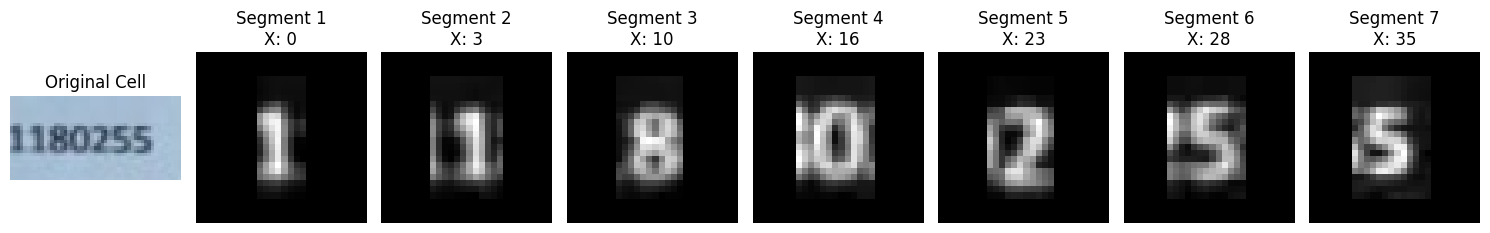

Predicted Number: 1180255


In [12]:
import os
import sys

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# Robust import: try direct import, otherwise add likely project paths and retry.
number_recognizer = None
try:
    from Module1GradesSheet.src.Recognition.NumberRecognition.NumberRecognition import number_recognizer
except Exception:
    # Try adding candidate parent directories to sys.path to allow package import from notebooks
    cwd = os.path.abspath(os.getcwd())
    candidates = [
        cwd,
        os.path.abspath(os.path.join(cwd, "..")),        # parent
    ]
    for p in candidates:
        if p not in sys.path:
            sys.path.insert(0, p)
    try:
        from src.Recognition.NumberRecognition.NumberRecognition import number_recognizer
    except Exception as e:
        print("Could not import number_recognizer:", e)
        number_recognizer = None

image_path = '../data/cells/3/row4_cell1.jpg'
cell_img = cv.imread(image_path)

if cell_img is None:
    print("Error: Could not load image. Check the path!")
else:
    if number_recognizer is None:
        print("number_recognizer is not available. Fix the import path or ensure the module exists.")
    else:
        recognizer = number_recognizer() if callable(number_recognizer) else number_recognizer

        # Get the raw segments
        blobs = recognizer.segment_digits_raw(cell_img)

        print(f"Found {len(blobs)} potential segments.")

        fig, axes = plt.subplots(1, len(blobs) + 1, figsize=(15, 5))

        axes[0].imshow(cv.cvtColor(cell_img, cv.COLOR_BGR2RGB))
        axes[0].set_title("Original Cell")
        axes[0].axis('off')

        for i, b in enumerate(blobs):
            digit_ready = recognizer.standardize_digit(b['roi'])

            axes[i + 1].imshow(digit_ready, cmap='gray')
            axes[i + 1].set_title(f"Segment {i+1}\nX: {b['x']}")
            axes[i + 1].axis('off')

        plt.tight_layout()
        plt.show()
        print("Predicted Number: " + recognizer.predict_id_from_cell(cell_img,recognition_method="ALREADY_MADE_OCR"))